In [1]:
pip install requests beautifulsoup4 pandas matplotlib seaborn wordcloud


     -------------------------------------- 187.3/187.3 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


🌐 Step 2: Scrape Job Listings (Static HTML Example from RemoteOK)

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://remoteok.io/remote-dev-jobs"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

job_posts = soup.find_all('tr', class_='job')

data = []
for job in job_posts:
    title = job.find('h2')  # job title
    company = job.find('h3')  # company name
    tags = job.find_all('div', class_='tag')  # skills/technologies
    date = job.find('time')  # posted time

    if title and company:
        data.append({
            'Job Title': title.text.strip(),
            'Company': company.text.strip(),
            'Skills': [tag.text for tag in tags],
            'Posted': date['datetime'] if date else 'Unknown'
        })

df = pd.DataFrame(data)
print(df.head())


                              Job Title            Company  \
0        Senior Python Backend Engineer            Orga AI   
1                      Svelte Developer  Green Stuff World   
2           Principal Software Engineer             CEF.Ai   
3  WordPress Plugins & Themes developer          Melapress   
4                     Software engineer       Sticker Mule   

                                              Skills  \
0  [\n\n\t\t\t\t\t\t\t\t\t\t\t\tPython\t\t\t\t\t\...   
1  [\n\n\t\t\t\t\t\t\t\t\t\t\t\tJavaScript\t\t\t\...   
2  [\n\n\t\t\t\t\t\t\t\t\t\t\t\tOther\t\t\t\t\t\t...   
3  [\n\n\t\t\t\t\t\t\t\t\t\t\t\tDevOps\t\t\t\t\t\...   
4  [\n\n\t\t\t\t\t\t\t\t\t\t\t\tEngineer\t\t\t\t\...   

                      Posted  
0  2025-07-26T00:00:07+00:00  
1  2025-08-02T00:00:03+00:00  
2  2025-07-29T13:16:27+00:00  
3  2025-07-22T09:40:58+00:00  
4  2025-07-28T09:46:06+00:00  


🧹 Step 3: Clean Data

In [3]:
# Join skills into one string
df['Skills_str'] = df['Skills'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Convert date
df['Posted'] = pd.to_datetime(df['Posted'], errors='coerce')


📊 Step 4: Skill Frequency Analysis

C:\Users\Manzar\AppData\Local\Temp\ipykernel_12368\3502295933.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')
C:\Users\Manzar\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


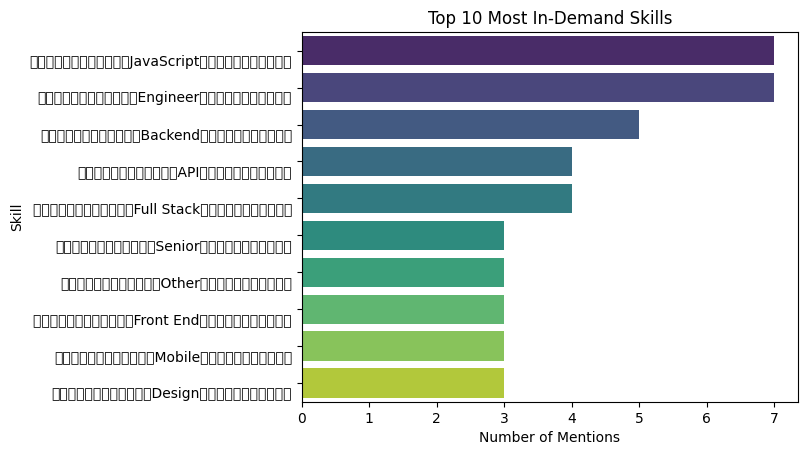

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all skills into a single list
all_skills = sum(df['Skills'], [])
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)

# Convert to DataFrame for plotting
skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])

# Bar Plot
sns.barplot(x='Count', y='Skill', data=skills_df, palette='viridis')
plt.title('Top 10 Most In-Demand Skills')
plt.xlabel('Number of Mentions')
plt.ylabel('Skill')
plt.show()


📌 Bonus: Skills by City (Heatmap/Group Count)

In [7]:
# Example addition to your BeautifulSoup scraping loop
location = job.find('div', class_='location')  # adjust based on site HTML

data.append({
    'Job Title': title.text.strip(),
    'Company': company.text.strip(),
    'Skills': [tag.text for tag in tags],
    'Posted': date['datetime'] if date else 'Unknown',
    'Location': location.text.strip() if location else 'Remote'  # <== added
})


🚀 If Website Uses JavaScript (Use Selenium Instead)

In [10]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome()
driver.get("https://www.indeed.com/jobs?q=python+developer")

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Same parsing logic...
driver.quit()


In [11]:
import os
import site
import datetime
import subprocess

# Get current year
current_year = datetime.datetime.now().year

# Get site-packages path
site_packages = site.getsitepackages()[0]

# Track unused libraries
unused_libs = []

# Loop through .dist-info folders
for item in os.listdir(site_packages):
    if item.endswith('.dist-info'):
        full_path = os.path.join(site_packages, item)
        lib_name = item.split('-')[0]

        # Get last accessed time
        last_access = datetime.datetime.fromtimestamp(os.path.getatime(full_path))
        if last_access.year < current_year:
            unused_libs.append(lib_name)

# Save unused libs to file
with open('unused_libraries.txt', 'w') as f:
    for lib in unused_libs:
        f.write(lib + '\n')

# Uninstall unused libraries
for lib in unused_libs:
    try:
        subprocess.run(['pip', 'uninstall', '-y', lib], check=True)
        print(f"Uninstalled: {lib}")
    except subprocess.CalledProcessError:
        print(f"Failed to uninstall: {lib}")



In [12]:
pip install pipreqs


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 798.3/798.3 kB 2.0 MB/s eta 0:00:00
     ------------------------------------ 258.5/258.5 kB 993.1 kB/s eta 0:00:00
  Using cached backcall-0.2.0-py2.py3-none-any.whl (11 kB)
  Using cached pickleshare-0.7.5-py2.py3-none-any.whl (6.9 kB)
     -------------------------------------- 163.4/163.4 kB 1.2 MB/s eta 0:00:00
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl (15 kB)
     -------------------------------------- 53.4/53.4 kB 696.3 kB/s eta 0:00:00
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl (8.7 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13773 sha256=c2fe33eedc6014df25af7ba517465445be7dcdad735be57428bba1dd451af35e
  Stored in directory: c:\users\manzar\appdata\local\pip\cache\wheels\76\25\ee\b12ae221ba5f661381528ff30a6a7af


[notice] A new release of pip available: 22.3 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Step 2: Compare used vs installed
used = set()
with open('requirements.txt', 'r') as f:
    for line in f:
        lib = line.strip().split('==')[0]
        used.add(lib.lower())

unused = []
with open('all_installed.txt', 'r') as f:
    for line in f:
        lib = line.strip().split('==')[0]
        if lib.lower() not in used:
            unused.append(lib)

# Save unused libraries to file
with open('unused_libraries.txt', 'w') as f:
    for lib in unused:
        f.write(lib + '\n')

print(f"Found {len(unused)} unused libraries. Saved to unused_libraries.txt")


Found 331 unused libraries. Saved to unused_libraries.txt


In [2]:
pip uninstall -y -r unused_libraries.txt


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '\u0a0d' (from line 166 of unused_libraries.txt)


In [5]:
# Safely write only valid, ASCII library names
import re

cleaned = []

with open('unused_libraries.txt', 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        lib = line.strip()

        # Only include lines that look like valid pip packages
        if re.match(r'^[a-zA-Z0-9_\-]+$', lib):
            cleaned.append(lib)

# Write to file without null characters
with open('unused_libraries_clean.txt', 'w', encoding='utf-8') as f:
    for lib in cleaned:
        f.write(lib + '\n')

print("✅ Clean file ready: unused_libraries_clean.txt")


✅ Clean file ready: unused_libraries_clean.txt


In [11]:
pip uninstall -y -r unused_libraries_clean.txt


Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to uninstall (see "pip help uninstall")


In [8]:
pip help uninstall


Usage:   
  c:\Users\Manzar\AppData\Local\Programs\Python\Python311\python.exe -m pip uninstall [options] <package> ...
  c:\Users\Manzar\AppData\Local\Programs\Python\Python311\python.exe -m pip uninstall [options] -r <requirements file> ...

Description:
  Uninstall packages.
  
  pip is able to uninstall most installed packages. Known exceptions are:
  
  - Pure distutils packages installed with ``python setup.py install``, which
    leave behind no metadata to determine what files were installed.
  - Script wrappers installed by ``python setup.py develop``.

Uninstall Options:
  -r, --requirement <file>    Uninstall all the packages listed in the given
                              requirements file.  This option can be used
                              multiple times.
  -y, --yes                   Don't ask for confirmation of uninstall
                              deletions.
  --root-user-action <root_user_action>
                              Action if pip is run as a root us